In [54]:
# this line is only included for the notebook
%matplotlib inline

In [44]:
from os.path import join
from datetime import datetime
from dateutil.relativedelta import relativedelta # http://stackoverflow.com/questions/2217488/age-from-birthdate-in-python 
import pandas as pd
import matplotlib.pyplot as plt

todays_date = datetime.now()

WRANGLED_DIR = join('data', 'wrangled')
dfprofiles = pd.read_csv(join(WRANGLED_DIR, 'congress-twitter-profiles.csv'))
dftweets = pd.read_csv(join(WRANGLED_DIR, 'congress-tweets.csv'))
# later, we'll join this to the other dataframes
dfmembers = pd.read_csv(join('data', 'legislators-basic-info.csv'), parse_dates=['birthdate'])
# include only rep and sen
dfmembers = dfmembers[dfmembers.title.isin(['Rep', 'Sen'])]

As we did in the [Pandas lesson](PANDAS-FUN.ipynb), let's merge (using `bioguide_id` as the key) the legislator data (including party, title, birthdate) to the Twitter profiles dataframe `dfprofiles`:

In [45]:
dfpeeps = pd.merge(dfmembers, dfprofiles, on='bioguide_id')

## Relationship between number of tweets and twitter followers


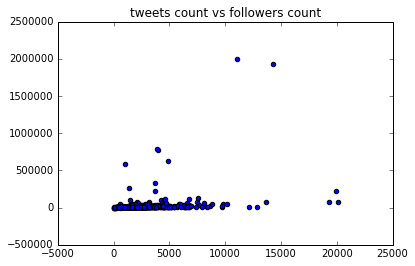

In [56]:
fig, ax = plt.subplots()

ax.scatter(dfpeeps['tweets_count'], dfpeeps['followers_count'])
ax.set_title('tweets count vs followers count');

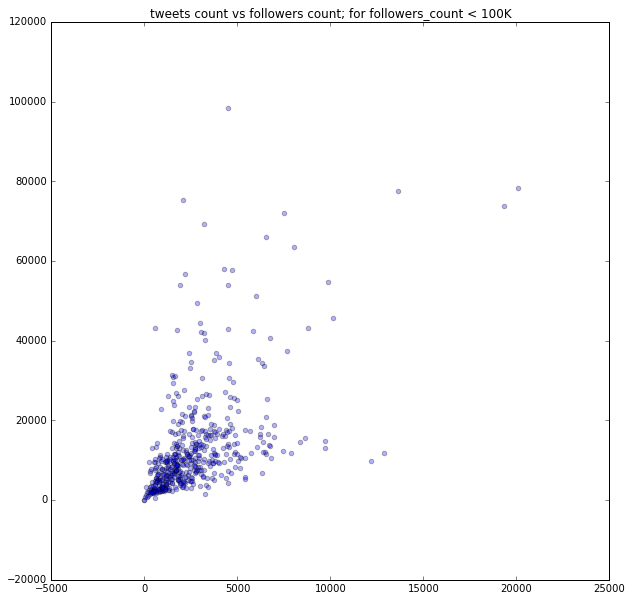

In [63]:
# ignore power users like McCain
fig, ax = plt.subplots(figsize=(10,10))
smallpeeps = dfpeeps[dfpeeps.followers_count < 100000]
ax.scatter(smallpeeps['tweets_count'], smallpeeps['followers_count'], alpha=0.3)
ax.set_title('tweets count vs followers count; for followers_count < 100K');

### Facet datapoints by party

Let's make Republican dots in red, Democrat dots in blue. An easy if inelegant way to do this is to filter the dataset by party, then plot both subsets on the same axes:

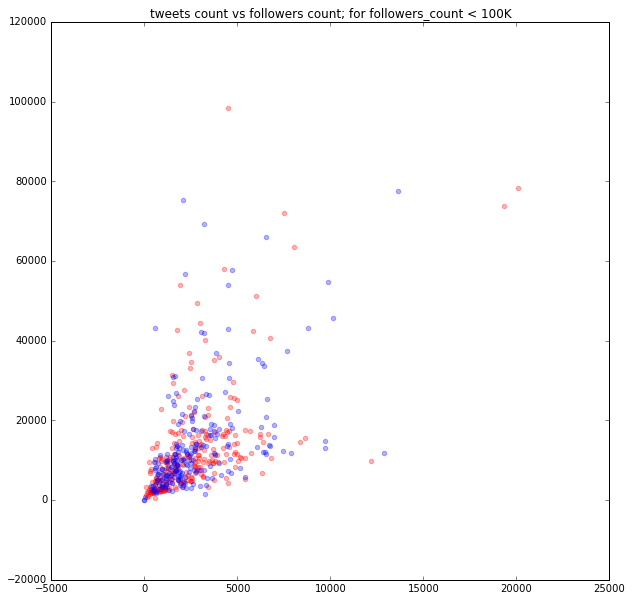

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
rdf = smallpeeps[smallpeeps.party == 'R']
ax.scatter(rdf['tweets_count'], rdf['followers_count'], alpha=0.3, color='red')
ddf = smallpeeps[smallpeeps.party == 'D']
ax.scatter(ddf['tweets_count'], ddf['followers_count'], alpha=0.3, color='blue')

ax.set_title('tweets count vs followers count; for followers_count < 100K');



### Grid chart, by gender

How do we compare men vs women? Adding a third and fourth color to the same graph will produce confusion. So let's make two charts that have the same form as above, except the dataset is further faceted by gender

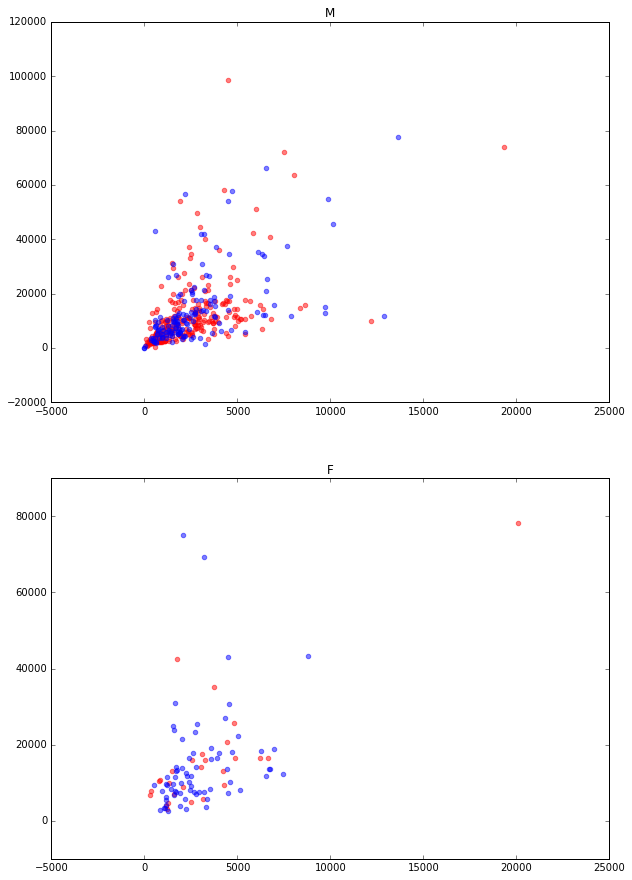

In [68]:
fig, axlist = plt.subplots(2, figsize=(10, 15))
genders = ['M', 'F']
nrow = len(genders)

for n in range(nrow): # n is an integer from 0 to 1
    # facet datset
    gx = genders[n]
    # pick the axis
    ax = axlist[n]
    ax.set_title(gx)
    # facet by gender
    gdf = smallpeeps[smallpeeps.gender == gx]
    # facet by party    
    r_gdf = gdf[gdf.party == 'R']
    ax.scatter(r_gdf['tweets_count'], r_gdf['followers_count'], color='red', alpha=0.5)
    d_gdf = gdf[gdf.party == 'D']
    ax.scatter(d_gdf['tweets_count'], d_gdf['followers_count'], color='blue', alpha=0.5)
    

## Average age of congressmembers

TKTK

In [46]:
# rough calculation of age, w/ no affordance for or leap years
dfpeeps['age'] = (todays_date - dfpeeps['birthdate']).dt.days / 365

In [47]:
dfpeeps['age'].mean()

59.37682959330521

In [48]:
dfpeeps.groupby('title')['age'].mean()

title
Rep    58.555260
Sen    63.095979
Name: age, dtype: float64

In [49]:
dfpeeps.groupby(['title', 'party'])['age'].mean()

title  party
Rep    D        61.261861
       R        56.474134
Sen    D        63.595523
       I        73.423288
       R        62.273260
Name: age, dtype: float64

In [50]:
dfpeeps.groupby(['title', 'party', 'gender'])['age'].mean()

title  party  gender
Rep    D      F         63.050348
              M         60.367617
       R      F         54.008095
              M         56.725304
Sen    D      F         67.497717
              M         61.980822
       I      M         73.423288
       R      F         59.203288
              M         62.614368
Name: age, dtype: float64